# NICE para calibración multiclase

Este notebook presenta un resumen del trabajo realizado hasta el momento (septiembre 2019). El objetivo es un estudio sobre el uso de NICE, un *normalizing-flow*, como método de calibración.

El notebook se organiza en los siguientes puntos principales:

* **Clasificación en 3 categorías.**
    * Gráficos ternarios.
    * Efecto de métodos de calibración.
    * CIFAR3.
* **NICE**
    * NICE en 3 dimensiones: efecto en el 2-símplex.
    * NICE como método de calibración para clasificadores.
    * NICE como calibración óptima en multiclase.




In [2]:
import os
import sys
import time
import itertools
sys.path.append('..')

import ternary
from ternary import scatter
import numpy as np
import tensorflow as tf
from scipy.special import softmax
import matplotlib.pyplot as plt

from utils.data import get_cifar10, get_cifar3, load_logits
from utils.ops import onehot_encode
from utils.metrics import neg_log_likelihood, expected_calibration_error
from utils.visualization import plot_pdf_simplex, plot_prob_simplex, reliability_diagram, plot_cal_regions_ternary
from calibrators import NiceCalibrator, TempScalingCalibrator

## Clasificación en 3 categorías:

Gran parte de los experimentos se han llevado a cabo en problemas de clasificación en 3 clases, el mínimo para ser considerado multiclase y la versión más simple del problema. Esta configuración tiene la ventaja añadida de tener una facil visualización de la distribución de probabilidad, que esta contenida en el 2-símplex estándar, permitiendo la representación en el plano. Apoyandonos en estos gráficos, podemos observar el efecto de las técnicas de calibración estado del arte como *temp-scaling*, señalando el por qué es necesario el uso de un método de calibración mas expresivo.

### Gráficos ternarios:

O *ternary plots*, son un tipo de diagramas que se emplean para representar 3 variables que suman una constante. El diagrama consiste en un triangulo equilatero en el que las variables se pintan como puntos dentro del triangulo, cada vértice corresponde con el punto de valor máximo (la constante) que puede tomar cada variable, disminuyendo su valor en la dirección de la bisectriz que corta dicho vertice. Este tipo de gráficos resulta muy util para representar probabilidades. Por ejemplo:

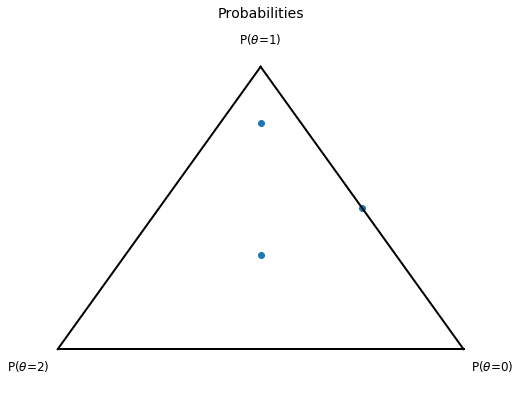

In [15]:
probs = np.array([[1/3., 1/3., 1/3.],
                  [0.5, 0.5, 0],
                  [0.1, 0.8, 0.1]])

fig, ax = plt.subplots(figsize=(8, 6))

ax = plot_prob_simplex(probs, ax=ax)

plt.show();